## 1.Importing python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets



In scikit-learn many data sets available for practicing so we just pull digit data set from sk-learn’s <b> load_digits() function.
    

In [2]:
df = datasets.load_digits()
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

## 2.Explore dataset

In [8]:
len(df.target)

1797

In [9]:
df.target

array([0, 1, 2, ..., 8, 9, 8])


 <br>
 <b>dataset is divided into two path, digits.images contains hand written digits(X) and 
 digits.target contains labels(Y) .both are numPy arrays and size is 1797.
 That means we have 1797 images and their true labels.  
  <br> 

## 3.Plot image of the digits using matplotlib

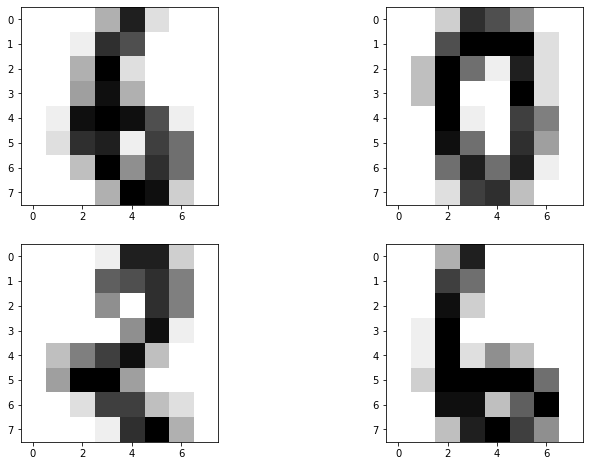

In [10]:
fig , axes = plt.subplots(nrows=2,ncols=2, figsize=(12,8))

axes[0,0].imshow(df.images[34], cmap=plt.cm.gray_r)
axes[0,1].imshow(df.images[20], cmap=plt.cm.gray_r)
axes[1,0].imshow(df.images[54], cmap=plt.cm.gray_r)
axes[1,1].imshow(df.images[67], cmap=plt.cm.gray_r)

## 4.Split the data

split the dataset 70 percent for training and 30 percent for testing 


In [19]:
X_train,X_test, y_train,y_test = train_test_split(df.data, df.target, test_size=0.30)

X_train.shape

(1257, 64)

## 5.Paramter optimization

apply GridSearch to find out best paramteres for the SVM algorithm

In [20]:
mod = SVC()

from sklearn.model_selection import GridSearchCV
mod1 = GridSearchCV(mod, param_grid={'kernel':['rbf','linear','poly'], 'C':[0.2,0.01,0.4,0.6,0.8,1]},cv=5)
mod1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.2, 0.01, 0.4, 0.6, 0.8, 1],
                         'kernel': ['rbf', 'linear', 'poly']})

In [21]:
mod1.best_params_

{'C': 0.6, 'kernel': 'poly'}

## 6.Fit the model 

So from GridSearch we got best parameters then we are now going to train the model with these parameters

In [22]:
mod2 = SVC(kernel='poly', C=0.8)
mod2.fit(X_train, y_train)

SVC(C=0.8, kernel='poly')

In [23]:
y_pred = mod2.predict(X_test)

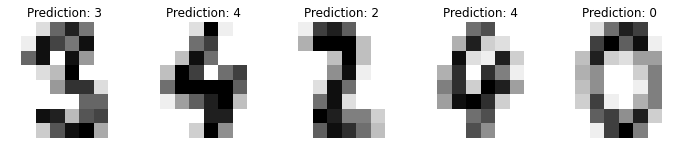

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(12,8))

for ax,img,label in zip(axes,X_test,y_pred):
    ax.set_axis_off()
    img= img.reshape(8,8)
    ax.imshow(img, cmap=plt.cm.gray_r)
    ax.set_title("Prediction: %i"%label)

## 7.Check the accuracy of the model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      0.97      0.98        65
           2       1.00      1.00      1.00        57
           3       0.97      0.98      0.97        57
           4       0.98      1.00      0.99        47
           5       0.98      0.96      0.97        48
           6       1.00      1.00      1.00        61
           7       1.00      0.98      0.99        52
           8       0.98      0.98      0.98        50
           9       0.94      0.98      0.96        52

    accuracy                           0.99       540
   macro avg       0.98      0.99      0.98       540
weighted avg       0.99      0.99      0.99       540

------------


<AxesSubplot:>

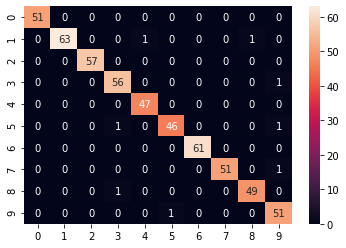

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(classification_report(y_pred, y_test))
print("-"*12)
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [32]:
print('Test set score is \n', mod2.score(X_test,y_test))

Test set score is 
 0.9851851851851852




So we got accuracy greater than 95 percent. Here we have to test the hypothesis that whether the accuracy is greater than 95 % everytime or not. So Ho:Null Hypothesis(Accuracy greater than 95 %) Ha|:Alternate Hypothesis(Accuracy is not greater than 95 %)

To test the hypothesis let's take another classifier if for that classifier accuracy is also greater than 95 % then the null hypothesis will be accepted otherwise alternate hypothesis will be accepted.


## 8.Decision Tree Classifier 

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf1 = GridSearchCV(clf, param_grid={ 'criterion':['gini','entropy'], 'min_samples_leaf':[1,2,3,4,5]},cv=5)
clf1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [34]:
clf1.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1}

In [35]:
mod3 =  DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
mod3.fit(X_train,y_train)

y2_pred= mod3.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.89      0.88      0.88        64
           2       0.82      0.89      0.85        53
           3       0.90      0.85      0.87        61
           4       0.90      0.86      0.88        50
           5       0.96      0.82      0.88        55
           6       0.95      0.91      0.93        64
           7       0.78      0.91      0.84        44
           8       0.74      0.77      0.76        48
           9       0.76      0.79      0.77        52

    accuracy                           0.86       540
   macro avg       0.86      0.86      0.86       540
weighted avg       0.87      0.86      0.87       540



<AxesSubplot:>

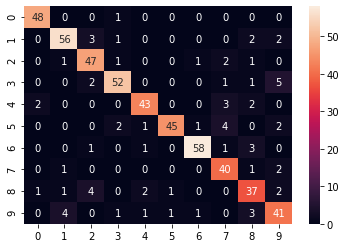

In [37]:
print(classification_report(y2_pred,y_test))

sns.heatmap(confusion_matrix(y2_pred,y_test),annot=True)

In [38]:
print('Test score: ',mod3.score(X_test,y_test))

Test score:  0.8648148148148148


Here the test score accuracy is 86.49% which is <b>less than 95%

In [39]:
mod4 =  DecisionTreeClassifier(criterion='gini',min_samples_leaf=1)
mod4.fit(X_train,y_train)




DecisionTreeClassifier()

In [44]:
print("test score: ",mod4.score(X_test,y_test))

test score:  0.8481481481481481


Test score accuracy is 84.8% which is <b>less than 95%

## CONCLUSION



As per the above analysis, not all the time the dataset gives accuracy greater than 95% it depends upon the algorithm with which we are trying to predict as well as the parameters of that algorithm.

So the Null Hypothesis(Accuracy greater than 95 %) will be rejected and Alternate Hypothesis(Accuracy is not always greater than 95 %) will be accepted.